# GROUP 6 

# STARTUPS DATASET

Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score
import warnings
warnings.filterwarnings("ignore")

Loading data

In [2]:
startup=pd.read_csv('Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# STEP 1. DATA EXPLORATION

1.1 Shape and size

In [3]:
startup.shape

(50, 5)

In [4]:
startup.size

250

In [5]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

1.2. Checking missing values

In [7]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

1.3. Data description 

In [8]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
startup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [10]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# STEP 2. FILTERING AND GROUPING

2.1. Grouping data by states

In [11]:
df=startup.groupby('State')['R&D Spend','Administration','Marketing Spend','Profit'].mean()
df

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


# STEP 3. DATA VISUALISATION

3.1. Histograms of variables

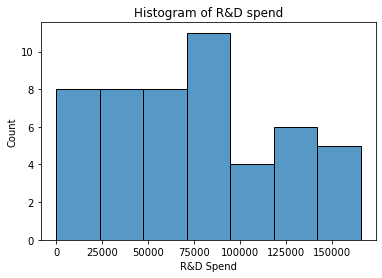

In [12]:
plt.title('Histogram of R&D spend')
sns.histplot(startup,x='R&D Spend');

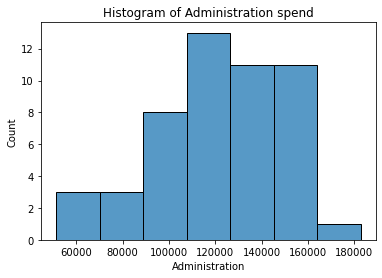

In [13]:
plt.title('Histogram of Administration spend')
sns.histplot(startup,x='Administration');

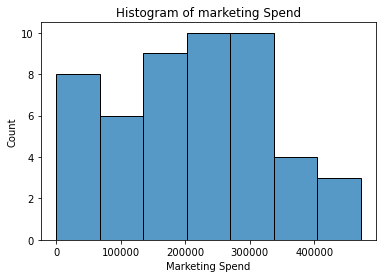

In [14]:
plt.title('Histogram of marketing Spend')
sns.histplot(startup,x='Marketing Spend');

3.2. Boxplot of Profit

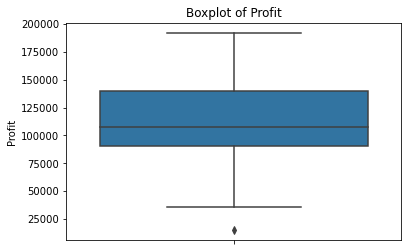

In [15]:
plt.title('Boxplot of Profit')
sns.boxplot(data=startup,y='Profit');

On the Boxplot above, we can see a outlier. To remove this one 

# Check the outlier points:

In [16]:
for x in ['Profit']:
    q75,q25=np.percentile(startup.loc[:,x],[75,25])
    intr_qr=q75-q25
    max=q75+(1.5*intr_qr)
    min=q25-(1.5*intr_qr)
    startup.loc[startup[x]<min,x]=np.nan
    startup.loc[startup[x]>max,x]=np.nan

# Removing outlier points:

In [17]:
startup=startup.dropna()
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

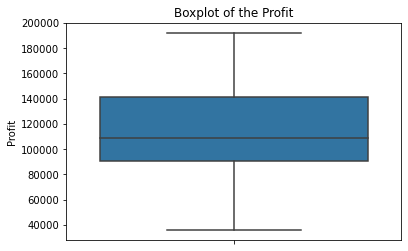

In [18]:
plt.title('Boxplot of the Profit')
sns.boxplot(data=startup,y='Profit');

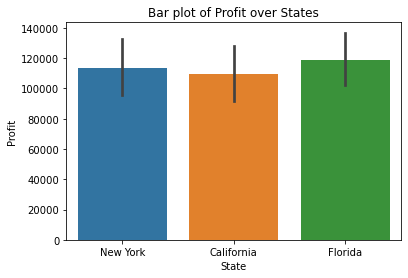

In [19]:
plt.title('Bar plot of Profit over States')
sns.barplot(data=startup,x='State',y='Profit');

# STEP 4. CORRELATION ANALYSIS

4.1. Scatterplot matrix

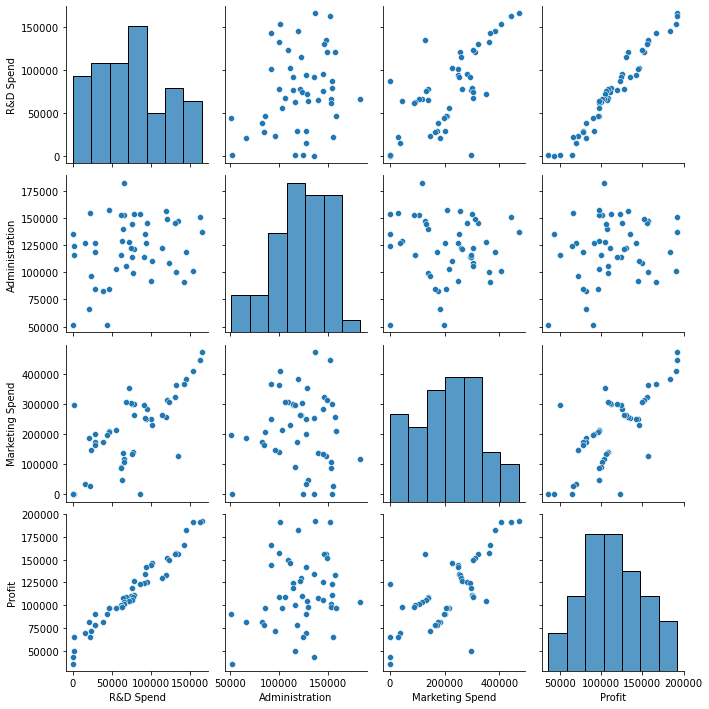

In [20]:
sns.pairplot(startup)

4.2. Correlation matrix

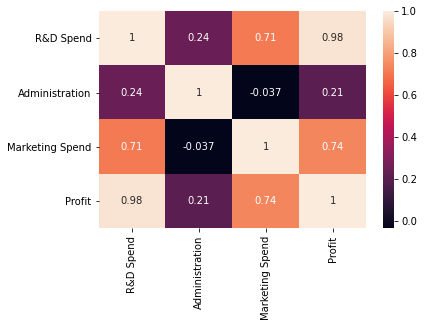

In [21]:
corrMatrix=startup.corr()
sns.heatmap(corrMatrix,annot=True);

1. There is a strong correlation between R&D and Profit

# Linear model plot

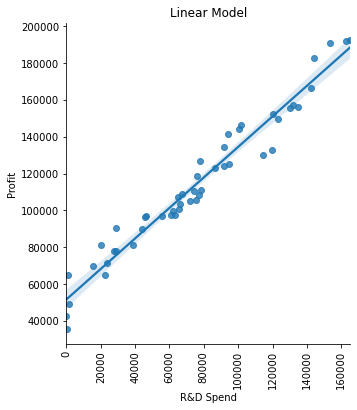

In [22]:
sns.lmplot(data=startup,x='R&D Spend',y='Profit')
plt.title('Linear Model')
plt.xticks(rotation=90)
plt.show()

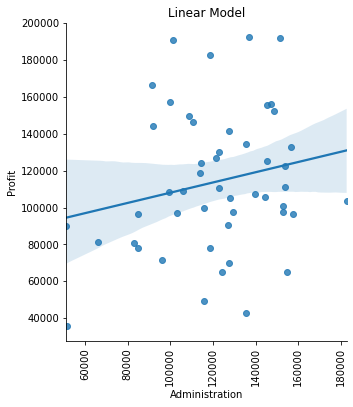

In [23]:
sns.lmplot(data=startup,x='Administration',y='Profit')
plt.title('Linear Model')
plt.xticks(rotation=90)
plt.show()

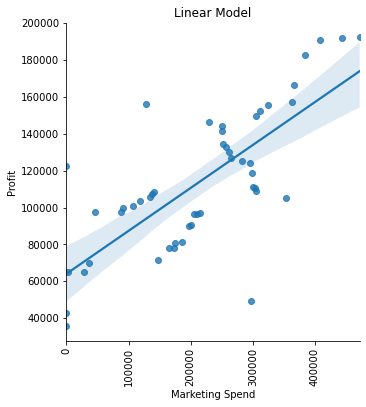

In [24]:
sns.lmplot(data=startup,x='Marketing Spend',y='Profit')
plt.title('Linear Model')
plt.xticks(rotation=90)
plt.show()

# Criteria of model selection

We choose the explanatory variables (R&D Spend, Administration, Marketing Spend, State)
and the outcome variable (Profit) as we notice that the outcome variable is a continuous variable
and we have more than one explanatory variable  then the best model to fit this data is
the Multiple Linear Regression model.

# STEP 4. MODEL BUILDING

4.1 Multiple linear Regression model "State variable excluded":

In [25]:
X=startup[['R&D Spend','Administration','Marketing Spend']].values
y=startup[['Profit']].values
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)
reg_model=LinearRegression()
reg_model.fit(X_train,Y_train)

LinearRegression()

[53150.55477557]
[[ 0.79670098 -0.02905024  0.02112058]]
      Actuel      Predicted
0  101004.64  103235.711419
1  166187.94  171446.348313
2  105733.54  111809.169543
3   99937.59  101106.955291
4   97427.84  100887.942015
5   89949.14   90932.715184
6   96712.80   90009.372850
7   78239.91   76264.911067
8  155752.60  159571.982638
9  146121.95  135972.032102


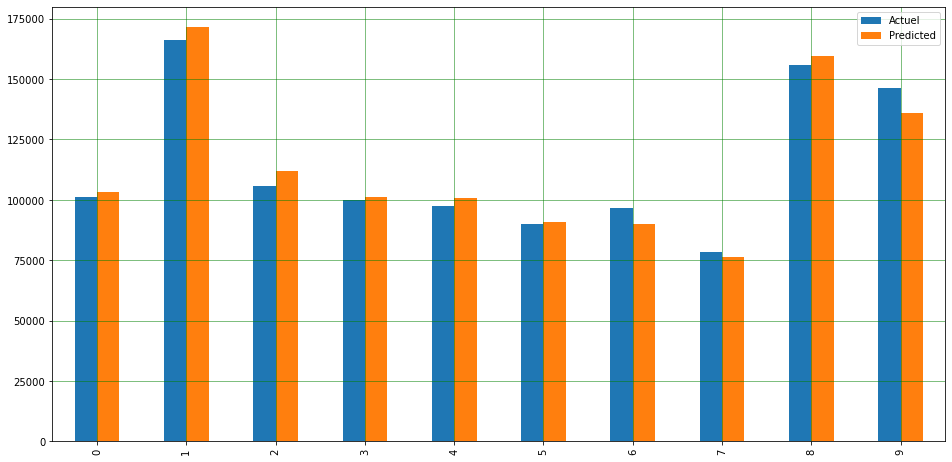

In [26]:
print(reg_model.intercept_)
print(reg_model.coef_)
y_pred=reg_model.predict(X_test)
df=pd.DataFrame({'Actuel':Y_test.flatten(),'Predicted':y_pred.flatten()})
print(df)
df1=df
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major',linestyle="-",linewidth="0.5",color="green")
plt.grid(which='minor',linestyle=":",linewidth="0.5",color="black")
plt.show()

In [27]:
 mean_squared_error(Y_test, y_pred)

25029402.668980937

4.2 Multiple linear Regression model "State variable included":

In [28]:
df_dummies=pd.get_dummies(startup,columns=['State']) # dumies is used to transform categorical variables into numerical (binary) variables


In [29]:
df_dummies

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [30]:
X_d=df_dummies[['R&D Spend','Administration','Marketing Spend','State_California','State_Florida']].values

In [31]:
X_train,X_d_test,Y_train,Y_test=train_test_split(X_d,y,test_size=0.2,random_state=0)
reg_model_d=LinearRegression()
reg_model_d.fit(X_train,Y_train)

LinearRegression()

[52490.55229604]
[[ 7.96748225e-01 -3.07414821e-02  2.12933399e-02  1.91236010e+03
   8.33448290e+02]]
      Actuel      Predicted
0  101004.64  102338.503617
1  166187.94  171535.201604
2  105733.54  111765.564075
3   99937.59  101103.496591
4   97427.84  101932.715588
5   89949.14   92134.461493
6   96712.80   91033.642854
7   78239.91   77347.989426
8  155752.60  159561.410833
9  146121.95  136002.841289


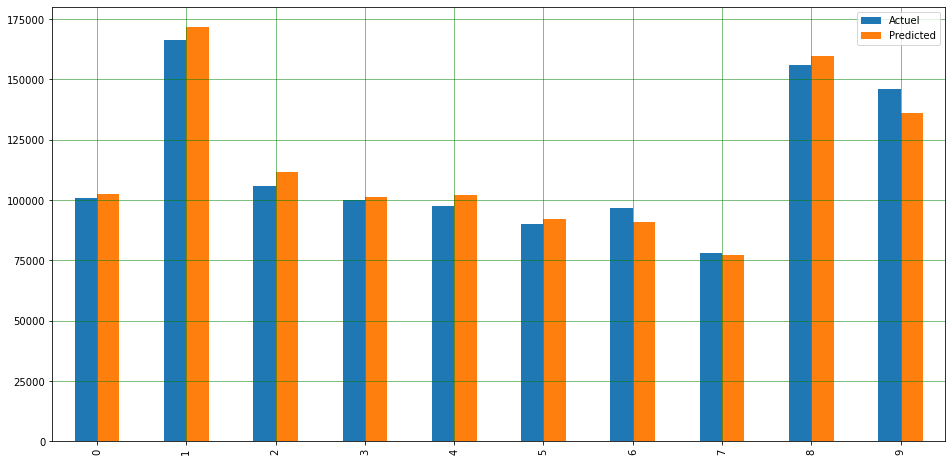

In [32]:
print(reg_model_d.intercept_)
print(reg_model_d.coef_)
y_pred=reg_model_d.predict(X_d_test)
df_d=pd.DataFrame({'Actuel':Y_test.flatten(),'Predicted':y_pred.flatten()})
print(df_d)
df1=df_d
df1.plot(kind='bar',figsize=(16,8))
plt.grid(which='major',linestyle="-",linewidth="0.5",color="green")
plt.grid(which='minor',linestyle=":",linewidth="0.5",color="black")
plt.show()

In [39]:
 mean_squared_error(Y_test, y_pred)

24313833.47791428

# Conclusion

1. We built the first model to predict the profit by considering the explanatory variables : R&D Spend, 
Administration charges and Marketing spend. For this model the Mean-Square-Error (MSE) is  25029402.668980937

2. The second model is built by considering States like an additionnal explanatory variable. State is a categorical variable therefore, to include it in the model, we must change it in dummies variable. For this model the Mean-Square-Error (MSE) is 24313833.47791428

